In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data= pd.read_csv("Data/Real-Data/Real_Combine.csv")

In [4]:
x=data.drop('PM 2.5',axis=1)
y=data['PM 2.5']

In [5]:
# Train test split
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.3)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
rf= RandomForestRegressor()

In [8]:
# Hyperparameters
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split= [2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

# creating a random grid
param={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [9]:
# perform hyperparamter tuning using randomized search cv
from sklearn.model_selection import RandomizedSearchCV

In [10]:
model= RandomizedSearchCV(rf,param_distributions=param,cv=5,n_iter=10, verbose=2, n_jobs=1, scoring="neg_mean_squared_error")

In [11]:
model.fit(xtr,ytr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, 

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=700, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [12]:
ypred=model.predict(xte)

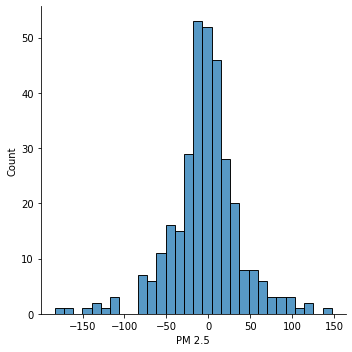

In [13]:
sns.displot(yte-ypred)

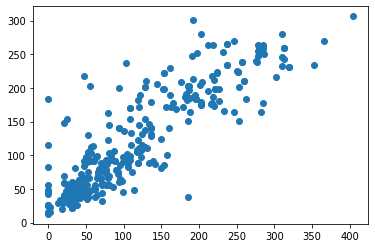

In [14]:
plt.scatter(yte,ypred)

In [15]:
# Saving the random forest model.
import pickle
file= open("random_forest.pkl",'wb')
pickle.dump(model,file)